In [1]:
import numpy
import gzip
from collections import defaultdict
import scipy.optimize
import random
from math import exp
from math import log
from sklearn import svm
import matplotlib.pyplot as plt  

In [2]:
def parseData(fname):
  for l in open(fname):
    yield eval(l)

In [3]:
print "Reading data..."
reviewdata = list(parseData("yelp_training_set_review.json"))
checkindata = list(parseData("yelp_training_set_checkin.json"))
userdata = list(parseData("yelp_training_set_user.json"))
businessdata = list(parseData("yelp_training_set_business.json"))
print "done"

Reading data...
done


In [4]:
# Divide the review data
train_data = reviewdata[:200000]
test_data = reviewdata[200000:]

In [5]:
len(userdata)

43873

In [88]:
ratings = [0]*6
for r in reviewdata:
    if r['stars'] == 0:
        ratings[0] += 1
    if r['stars'] == 1:
        ratings[1] += 1
    if r['stars'] == 2:
        ratings[2] += 1
    if r['stars'] == 3:
        ratings[3] += 1
    if r['stars'] == 4:
        ratings[4] += 1
    if r['stars'] == 5:
        ratings[5] += 1

In [17]:
X = [0.9,1.9,2.9,3.9,4.9]

In [18]:
ratings

[17516, 20957, 35363, 79878, 76193]

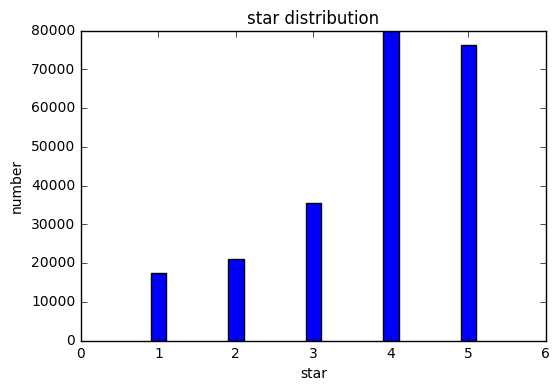

In [21]:
fig = plt.figure()  
plt.bar(X,ratings,0.2,color="blue")  
plt.xlabel("star")
plt.ylabel("number")
plt.title("star distribution")
plt.show()

In [33]:
year = []
for r in reviewdata:
    time = r['date'].split('-')
    year.append(int(time[0]))

In [51]:
stars = [0]*9
length = [0]*9
for y in reviewdata:
    time = y['date'].split('-')
    year = int(time[0])
    stars[year-2005] += y['stars'] 
    length[year-2005] += 1 

In [52]:
nian = range(2005, 2014)
for i in range(len(stars)):
    stars[i] = stars[i]*1.0/length[i]

In [53]:
stars

[4.138613861386139,
 3.770559210526316,
 3.831209713686104,
 3.7355260061190867,
 3.7203615497130857,
 3.7721923375067536,
 3.7812720349739104,
 3.7690188448812076,
 3.7467309015829318]

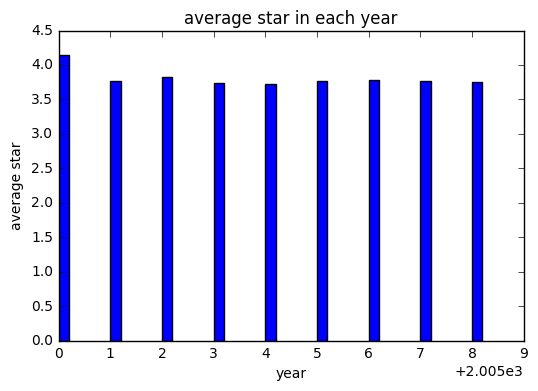

In [54]:
fig = plt.figure()  
plt.bar(nian,stars,0.2,color="blue")  
plt.xlabel("year")
plt.ylabel("average star")
plt.title("average star in each year")
plt.show()

In [63]:
businessCheckin = defaultdict(list)
businessStar = defaultdict(list)
checkinAvg = 0
starAvg = 0
checkin = []

for u in checkindata:
    business = u['business_id']
    nCheckin = 0
    for t in u['checkin_info']:
        nCheckin += u['checkin_info'][t]
    businessCheckin[business] = nCheckin
    checkin.append(nCheckin)
    checkinAvg += nCheckin
    
for u in businessdata:
    business = u['business_id']
    businessStar[business] = u['stars']
    starAvg += u['stars']
    
starAvg /= len(businessdata)
checkinAvg /= len(checkindata)

In [69]:
star = [0]*5
long = [0]*5
for u in businessCheckin:
    if businessCheckin[u] < 1000:
        if u in businessStar:
            star[0] += businessStar[u]
        else:
            star[0] += starAvg
        long[0] +=1
    if businessCheckin[u] < 2000 and businessCheckin[u] > 999:
        if u in businessStar:
            star[1] += businessStar[u]
        else:
            star[1] += starAvg
        long[1] +=1
    if businessCheckin[u] < 3000 and businessCheckin[u] > 1999:
        if u in businessStar:
            star[2] += businessStar[u]
        else:
            star[2] += starAvg
        long[2] +=1
    if businessCheckin[u] < 4000 and businessCheckin[u] > 2999:
        if u in businessStar:
            star[3] += businessStar[u]
        else:
            star[3] += starAvg
        long[3] +=1
    if businessCheckin[u] > 3999:
        if u in businessStar:
            star[4] += businessStar[u]
        else:
            star[4] += starAvg
        long[4] +=1

In [70]:
for i in range(5):
    star[i] /= long[i]

In [78]:
x = [0,1000, 2000, 3000, 4000]

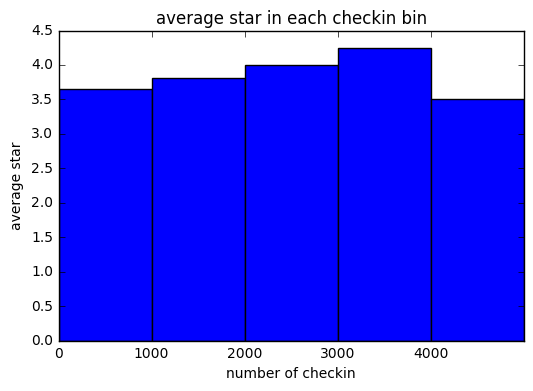

In [81]:
fig = plt.figure()  
plt.bar(x,star,1000,color="blue")
group_labels = ['0','1000','2000','3000','4000','22907']
plt.xticks(x, group_labels, rotation=0) 
plt.xlabel("number of checkin")
plt.ylabel("average star")
plt.title("average star in each checkin bin")
plt.show()

In [76]:
fig = plt.figure()  
plt.plot(x,star)
group_labels = ['0','1000','2000','3000','4000']
plt.xticks(x, group_labels, rotation=0) 
plt.show()

SyntaxError: invalid syntax (<ipython-input-76-c3c07b271650>, line 3)

In [84]:
max(checkin)

22977

In [114]:
count = []
star = []
for u in businessdata:
    count.append(u['review_count'])
    star.append(u['stars'])


In [115]:
haha = [0]*6
wocao = [0]*6
for i in range(len(count)):
    if count[i] < 151:
        haha[0] += star[i]
        wocao[0] +=1
    if count[i] < 301 and count [i] > 150:
        haha[1] += star[i]
        wocao[1] +=1
    if count[i] < 451 and count [i] > 300:
        haha[2] += star[i]
        wocao[2] +=1
    if count[i] < 601 and count [i] > 450:
        haha[3] += star[i]
        wocao[3] +=1
    if count[i] < 751 and count [i] > 600:
        haha[4] += star[i]
        wocao[4] +=1
    if count [i] > 750:
        haha[5] += star[i]
        wocao[5] +=1

In [117]:
for i in range(6):
    haha[i] /= wocao[i]

In [119]:
x= [0,150,300,450,600,750]

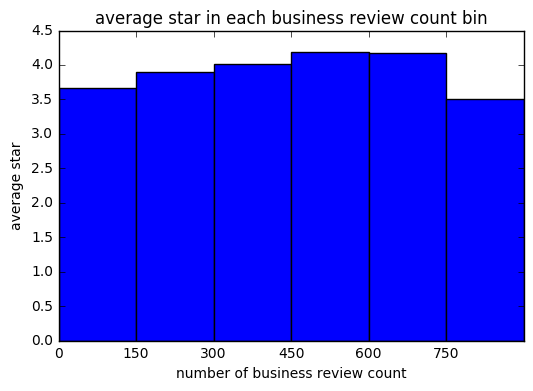

In [123]:
fig = plt.figure()  
plt.bar(x,haha,150,color="blue")
group_labels = ['0','150','300','450','600','750','862']
plt.xticks(x, group_labels, rotation=0) 
plt.xlabel("number of business review count")
plt.ylabel("average star")
plt.title("average star in each business review count bin")
plt.show()

In [5]:
trainReview = []
trainStar = []
for r in train_data:
    user, business = r['user_id'], r['business_id']
    trainReview.append(len(r['text'].split()))
    trainStar.append(r['stars'])

In [11]:
haha = [0]*7
wocao = [0]*7
for i in range(len(trainReview)):
    if trainReview[i] < 151:
        haha[0] += trainStar[i]
        wocao[0] +=1
    if trainReview[i] < 301 and trainReview[i] > 150:
        haha[1] += trainStar[i]
        wocao[1] +=1
    if trainReview[i] < 451 and trainReview[i] > 300:
        haha[2] += trainStar[i]
        wocao[2] +=1
    if trainReview[i] < 601 and trainReview[i] > 450:
        haha[3] += trainStar[i]
        wocao[3] +=1
    if trainReview[i] < 751 and trainReview[i] > 600:
        haha[4] += trainStar[i]
        wocao[4] +=1 
    if trainReview[i] < 901 and trainReview[i] > 750:
        haha[5] += trainStar[i]
        wocao[5] +=1
    if trainReview[i] > 900:
        haha[6] += trainStar[i]
        wocao[6] +=1

In [12]:
for i in range(7):
    haha[i] = haha[i]*1.0/ wocao[i]

In [15]:
x= [0,150,300,450,600,750,900]

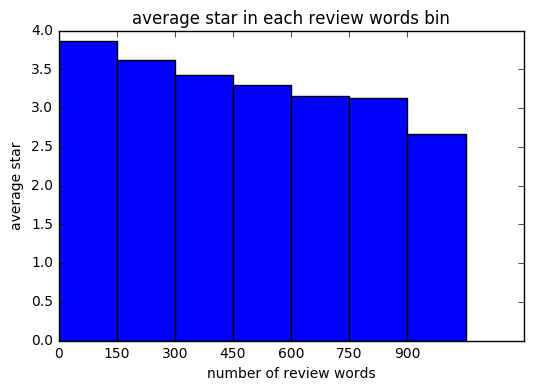

In [18]:
fig = plt.figure()  
plt.bar(x,haha,150,color="blue")
group_labels = ['0','150','300','450','600','750','900','1006']
plt.xticks(x, group_labels, rotation=0) 
plt.xlabel("number of review words")
plt.ylabel("average star")
plt.title("average star in each review words bin")
plt.show()